In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## The Data

 In the table is the average consumption of 17 types of food in grams per person per week for every country in the UK.

The table shows some interesting variations across different food types, but overall differences aren't so notable. 


In [2]:
df = pd.read_csv('../DATA/UK_foods.csv',index_col='Unnamed: 0')

In [3]:
df

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


In [4]:
df.transpose()

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


<AxesSubplot:>

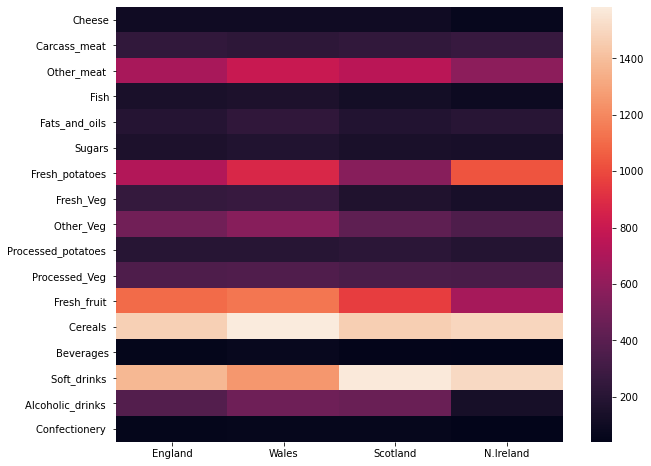

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(df)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [7]:
encoder = Sequential()
encoder.add(Dense(units=8,activation='relu',input_shape=[17]))
encoder.add(Dense(units=4,activation='relu',input_shape=[8]))
encoder.add(Dense(units=2,activation='relu',input_shape=[4]))

In [8]:
decoder = Sequential()
decoder.add(Dense(units=4,activation='relu',input_shape=[2]))
decoder.add(Dense(units=8,activation='relu',input_shape=[4]))
decoder.add(Dense(units=17,activation='relu',input_shape=[8]))

**Let us use the Encoder and Decoder to create the Autoencoder**

In [9]:
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss="mse" ,optimizer=SGD(lr=1.5))

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
scaled_df = scaler.fit_transform(df.transpose().values)

In [13]:
scaled_df

array([[1.        , 0.45      , 0.4562212 , 0.80597015, 0.17647059,
        0.47222222, 0.32976445, 0.90163934, 0.61860465, 0.33333333,
        0.83870968, 0.92440605, 0.08333333, 0.38461538, 0.37341772,
        0.70588235, 0.56521739],
       [0.94871795, 0.        , 1.        , 1.        , 1.        ,
        1.        , 0.65952891, 1.        , 1.        , 0.48484848,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        ],
       [0.94871795, 0.375     , 0.75576037, 0.43283582, 0.        ,
        0.22222222, 0.        , 0.2295082 , 0.29302326, 1.        ,
        0.09677419, 0.6112311 , 0.        , 0.23076923, 1.        ,
        0.95      , 0.91304348],
       [0.        , 1.        , 0.        , 0.        , 0.49019608,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26666667, 0.        , 0.79113924,
        0.        , 0.        ]])

In [14]:
autoencoder.fit(scaled_df,scaled_df,epochs=15)

Epoch 1/15
1/1 [==============================] - 0s 1ms/step - loss: 0.4239
Epoch 2/15
1/1 [==============================] - 0s 0s/step - loss: 0.3739
Epoch 3/15
1/1 [==============================] - 0s 998us/step - loss: 0.3211
Epoch 4/15
1/1 [==============================] - 0s 0s/step - loss: 0.2972
Epoch 5/15
1/1 [==============================] - 0s 0s/step - loss: 0.2892
Epoch 6/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2860
Epoch 7/15
1/1 [==============================] - 0s 0s/step - loss: 0.2842
Epoch 8/15
1/1 [==============================] - 0s 0s/step - loss: 0.2830
Epoch 9/15
1/1 [==============================] - 0s 1000us/step - loss: 0.2820
Epoch 10/15
1/1 [==============================] - 0s 998us/step - loss: 0.2810
Epoch 11/15
1/1 [==============================] - 0s 0s/step - loss: 0.2800
Epoch 12/15
1/1 [==============================] - 0s 997us/step - loss: 0.2789
Epoch 13/15
1/1 [==============================] - 0s 1ms/step - loss:

In [15]:
encoded_2dim = encoder.predict(scaled_df)

In [16]:
encoded_2dim

array([[0.8461751 , 0.992809  ],
       [0.82366437, 1.2717031 ],
       [0.51152533, 0.6943089 ],
       [0.24851814, 0.22612318]], dtype=float32)

In [17]:
df.transpose().index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [18]:
results = pd.DataFrame(data=encoded_2dim,index=df.transpose().index,
                      columns=['C1','C2'])

In [19]:
results = results.reset_index()

In [20]:
results

,index,C1,C2
0,England,0.846175,0.992809
1,Wales,0.823664,1.271703
2,Scotland,0.511525,0.694309
3,N.Ireland,0.248518,0.226123


<AxesSubplot:xlabel='C1', ylabel='C2'>

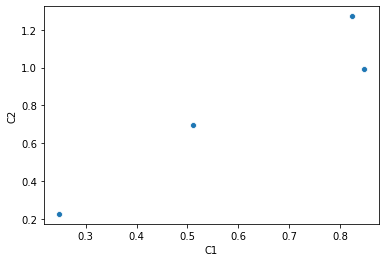

In [21]:
sns.scatterplot(x='C1',y='C2',data=results)

### Thus it can be infered that North Ireland at (0.2,0.2) is different than the others depending on its eating habits.